<a href="https://colab.research.google.com/github/Franulo/2D-Cave1/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt # for Diagramms

In [2]:
tensor = tf.constant([1, 2, 3])
print(tf.__version__)
tensor.shape

2.12.0


TensorShape([3])

# Neural Network Regression with TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

## Creating data to view and fit

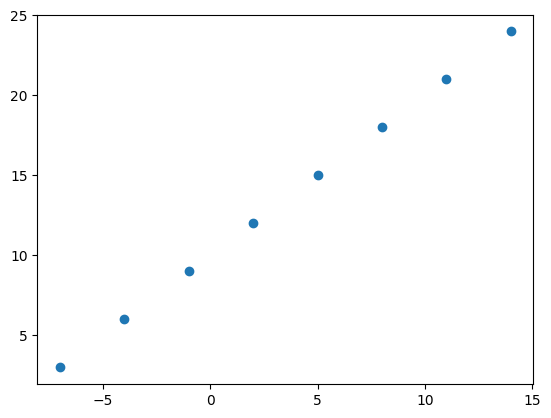

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

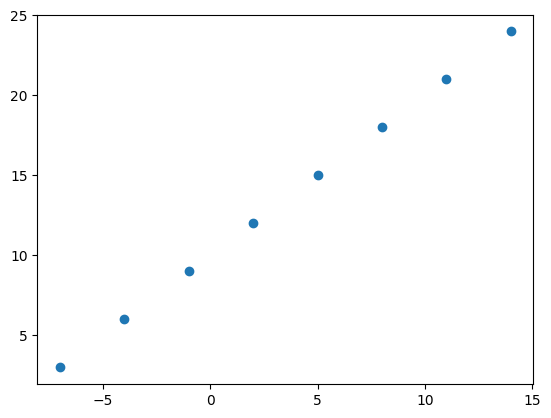

In [9]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a  model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=0)


In [11]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1))

model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model1.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [12]:
model.predict([11.0]), model1.predict([11.0])

1/1 [==============================] - 0s 72ms/step


(array([[20.171684]], dtype=float32), array([[19.193226]], dtype=float32))

In [13]:
X.numpy(), y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 44ms/step


array([[30.275784]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn form).

In [15]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [16]:
model.predict([14])

1/1 [==============================] - 0s 95ms/step


array([[24.635683]], dtype=float32)

In [17]:
X.numpy(), y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

## Evaluting a model

In practice, a typical workflow you'll go though when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the orginal labels)?

In [18]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x.numpy()

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)

In [19]:
# Make labels for the dataset
y = x + 10
y.numpy()

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)

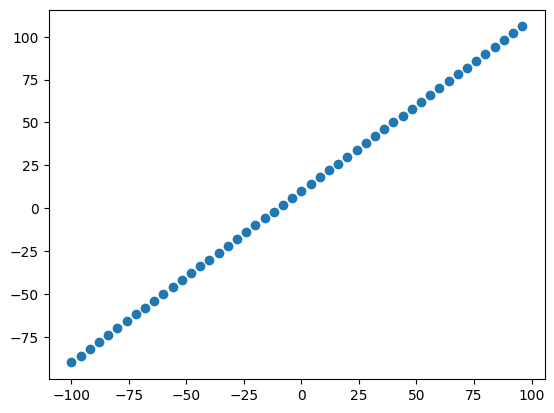

In [20]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x, y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learnend, this set is typically 10-15% of the total data available.

In [21]:
# Check the length of how many samples we have
len(x), len(y)

(50, 50)

In [22]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visulizee it again!


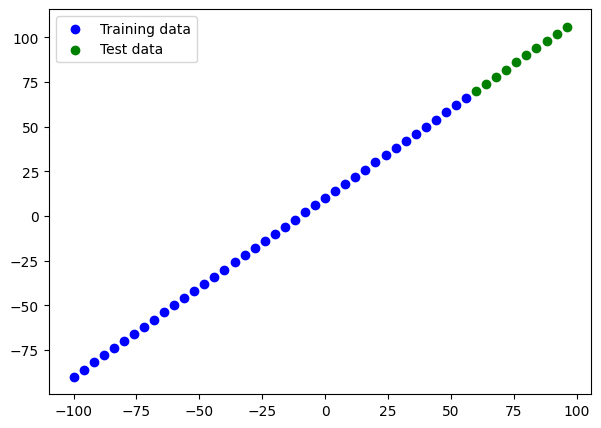

In [23]:
plt.figure(figsize=(7, 5))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Test data") # want our model to be able to predict this (given x what's y?)
# Show a legend
plt.legend()

In [110]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(45)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="layer1"),
], name="model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

### Visualizing the model

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                20        
                                                                 
 layer2 (Dense)              (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

In [ ]:
# Let's fit or model to the training data
model.fit(x_train, y_train, epochs=200, verbose=0)

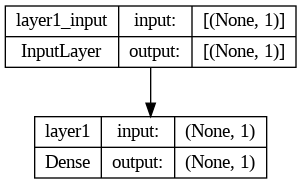

In [90]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels. 
Often you'll see this in the from of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [117]:
# Make some predictions
y_pred = model.predict(x_test) 
y_pred

1/1 [==============================] - 0s 26ms/step


array([[ 69.204384],
       [ 73.15332 ],
       [ 77.10225 ],
       [ 81.051186],
       [ 85.000114],
       [ 88.94905 ],
       [ 92.89798 ],
       [ 96.84692 ],
       [100.795845],
       [104.74478 ]], dtype=float32)

If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [142]:
# Let's create a plotting function
def plot_predictions(figsize=(8, 5),
                     train_data=x_train, 
                     train_labels=y_train, 
                     test_data = x_test, 
                     test_labels = y_test, 
                     predictions = y_pred):
  plt.figure(figsize=figsize)
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

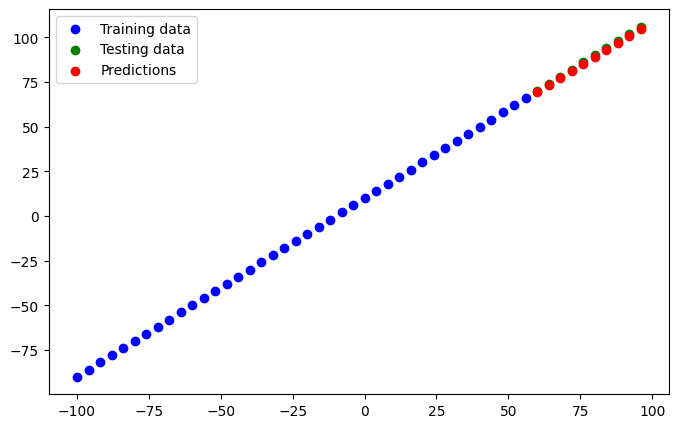

In [116]:
plot_predictions(figsize=(8, 5))

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [114]:
# Evaluate the model on the test data
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 143ms/step - loss: 1.0254 - mae: 1.0254


[1.0254173278808594, 1.0254173278808594]

In [130]:
tf.reduce_mean(tf.cast(y_test, dtype=tf.float32)-y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0254174>

In [131]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, 
                                        y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)


### Runnig experiments to improve our model

```
Build a model -> Fit it -> evaluate it -> tweak it -> fit it -> evaluate it 
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in form of more layers or more hidden units in each layer.
3. Train for longer - give your model more fo a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [145]:
x_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [146]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

1/1 [==============================] - 0s 36ms/step


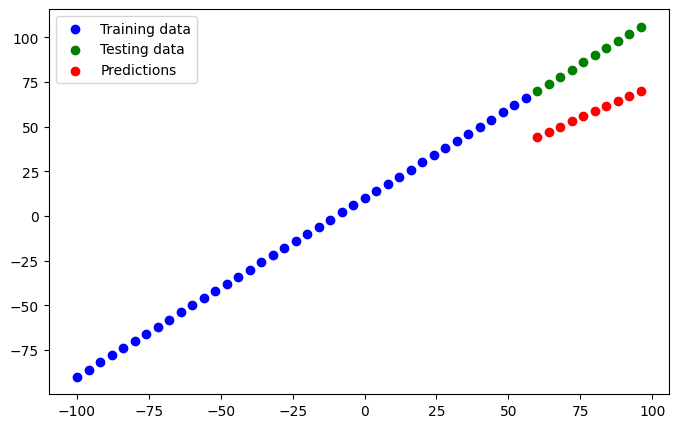

In [148]:
y_pred_1 = model_1.predict(x_test)
plot_predictions(predictions=y_pred_1, figsize=(8, 5))
y_pred_1 = tf.constant(y_pred_1, shape=(10, ))

In [149]:
tf.metrics.mean_absolute_error(y_test, y_pred_1)

<tf.Tensor: shape=(), dtype=float32, numpy=30.714361>

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

1/1 [==============================] - 0s 115ms/step


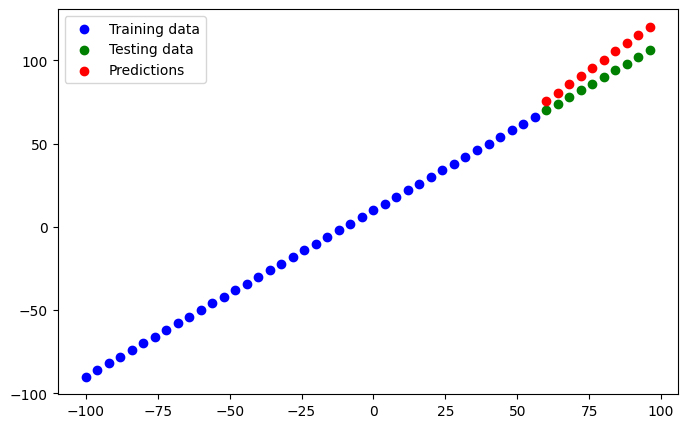

In [151]:
y_pred_2 = model_2.predict(x_test)
plot_predictions(predictions=y_pred_2, figsize=(8, 5))
y_pred_2 = tf.constant(y_pred_2, shape=(10, ))

In [152]:
tf.metrics.mean_absolute_error(y_test, y_pred_2)

<tf.Tensor: shape=(), dtype=float32, numpy=9.943218>